In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd

Suggestion: try PLA on this dataset before using the bank dataset

In [114]:
#X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
X, y = make_blobs(n_samples=100, centers=2, n_features=2)
#X, y = make_moons(n_samples=1000, noise=0.15)
y = [yy if yy == 1 else -1 for yy in y] 

In [106]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [107]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [108]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    # MPP return [pointOnBoundary(x_min), pointOnBoundary(x_max)]
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [109]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            #print(x,weights, h(x,weights),y)
            #print(h(x,weights)[0],y)
            #print("test")
            #if None:
            if (h(x,weights)[0]!=y):
                iterations+=1;
                # MPP weights = weights + y*(np.concatenate((bias,x)))
                weights = (weights.T + y*(np.concatenate((bias,x)))).T
                errors+=1;
                print("Iterations = ", iterations, "Weights = ", weights)
        if (errors == 0):
            break
    return weights, iterations

In [110]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

*** BLOB ***

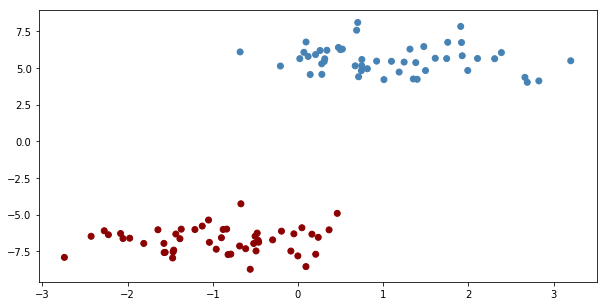

In [115]:
# Visualize the Data from make_blobs

# Assign colours based on the labels (1,-1) = (steelblue,darkred)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]

# Plot Blob Data
plt.rcParams["figure.figsize"] = (10, 5) 
plt.scatter(X[:,0], X[:,1], color=colors) 
plt.show() 

In [116]:
#bias = np.array([1])
#print(bias)
#print(X.shape)
weights = np.zeros([3,1])
#print(weights[0])
weights[0] = 1
#print(weights[0])
#iterations = 0
#print(weights)
#print(weights.shape)
weights, iterations = pla(X, y, weights)
# for a,b in zip(X, y):
#     print(a,b, a.shape)
#     bias = np.array([1])
#     c = (np.concatenate((bias,a)))
#     print(c,c.shape)
    

Iterations =  1 Weights =  [[0.        ]
 [0.2975591 ]
 [6.71286616]]


[[-2.97559102e-01 -6.71286616e+00]
 [-2.08190565e+00 -6.27798419e+00]
 [-6.13833832e-01 -7.31617623e+00]
 [-1.93956152e-01 -6.11869988e+00]
 [-8.20701866e-01 -7.71575713e+00]
 [-6.69809004e-01 -4.25209305e+00]
 [ 1.92707687e+00  5.84536165e+00]
 [ 2.06159468e-01  5.92637287e+00]
 [ 1.35361885e+00  4.26331683e+00]
 [ 2.80539718e-01  4.57623501e+00]
 [ 1.49663946e+00  4.83668155e+00]
 [-1.43331041e+00 -6.31440734e+00]
 [ 9.34319485e-02 -8.53562910e+00]
 [ 1.31378804e+00  6.29780156e+00]
 [ 1.90958236e+00  7.84562705e+00]
 [ 5.20851599e-01  6.30102173e+00]
 [-1.57330724e+00 -6.95316109e+00]
 [-2.22510979e+00 -6.36260852e+00]
 [ 6.71426044e-01  5.15819427e+00]
 [ 6.96089845e-02  6.08052885e+00]
 [ 1.39870842e+00  4.24008690e+00]
 [-5.03483911e-01 -6.46797426e+00]
 [ 3.07786482e-01  5.45697031e+00]
 [ 1.09710682e+00  5.46749610e+00]
 [ 1.19140844e-01  5.79850234e+00]
 [ 1.18693114e+00  4.73339253e+00]
 [-2.74133572e+00 -7.90872862e+00]
 [ 7.49661425e-01  5.58803623e+00]
 [-7.88301124e-01 -7

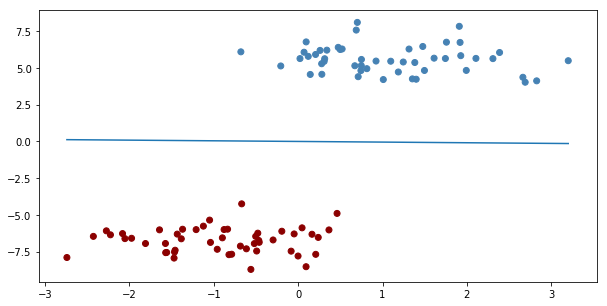

-2.7413357152741344
(100, 2)


In [117]:
y_bound = np.zeros([2])
X_bound = np.zeros([2])
X_bound[0] = X[:,0].min()# X.min()
X_bound[1] = X[:,0].max()#X.max()

y_bound[0], y_bound[1] = decision_boundary(weights, X_bound[0], X_bound[1])

print(X)
print(y)
print(X_bound)
print(y_bound)
plt.plot(X_bound, y_bound)
plt.scatter(X[:,0], X[:,1], color=colors) 
plt.show()

print(X[:,0].min())
print(X.shape)

In [118]:
xa = np.array([1,2])
print(xa)
print(xa.shape)
xa2 = np.concatenate((bias,xa))
print(xa2)
print(xa2.shape)
wa = np.array([[1], [2], [3]],)
print(wa)
print(wa.shape)
result = wa.T.dot(np.concatenate((bias,xa)))
print(result)
w2 = np.zeros([3,1])
print(w2)

[1 2]
(2,)
[1 1 2]
(3,)
[[1]
 [2]
 [3]]
(3, 1)
[9]
[[0.]
 [0.]
 [0.]]


In [119]:
bias = np.array([1])
x = np.array([1, 2])
y = np.array([-1])
weights = np.zeros([3,1])
#print(weights[0])
weights[0] = 1
print(weights)
weights = (weights.T + y*(np.concatenate((bias,x)))).T
print(weights)

[[1.]
 [0.]
 [0.]]
[[ 0.]
 [-1.]
 [-2.]]
